# Read SEQ-file plot, ...

## imports

In [1]:
import logging
#logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)
import numpy as np
from numpy import r_
import scipy as sp
import scipy.signal
import scipy.misc
import datetime
import os
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_formats = ['svg']
#%matplotlib inline
#%matplotlib notebook 
%matplotlib qt
#%matplotlib widget

mpl.rcParams['figure.figsize'] = r_[250, 120]/25.4
mpl.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.constrained_layout.use'] = True

## Installation of the fnv module:
* Download and install the "FLIR Science File SDK" from https://flir.custhelp.com/app/account/fl_download_software.
* Install Python module according https://flir.custhelp.com/app/answers/detail/a_id/3504/~/getting-started-with-flir-science-file-sdk-for-python  
    Attention: Use the setup.py attached to the "Getting started with ..."  as the one in the SDK is broken.   

In [3]:
## load SEQfileReader
import sys
# download form https://github.com/marthoch/SEQfileReader/
sys.path.insert(0, r'C:\data\GitHub\SEQfileReader\src')
sys.path.insert(0, r'..\PythonLib\SEQfileReader\src')
from SEQfileReader import SEQfileReader

## load data

In [4]:
filename = r'test.seq'

In [5]:
seq = SEQfileReader(filename, in_celsius=True)
seq

DEBUG:SEQfileReader.SEQfileReader:opening "test.seq"


SEQfileReader(filename=r'test.seq')
    camera: ............. FLIR A655sc / 55001-0302 / SN:55006122
    lens: ............... FOL25 / T197909 / SN:56597656
    interlaced: ......... False
    unit: ............... TEMPERATURE_FACTORY / CELSIUS 
    image size: ......... 640 x 120
    number of frames: ... 1999
    source time:          2022-12-07T07:38:04.226000
    recording start time: 2022-12-07T07:38:04.226000
    recording time: ..... 9.998 sec
    frame rate: ......... 200.0 Hz 
    current frame:
        frame number: ....... 0
        preset: ............. 0
        date/time of frame:   2022-12-07T07:38:04.226000
        emissivity:               0.949999988079071
        atmospheric_transmission: 0.9939431548118591
        distance: ................1.0
        preset: ............. 0  True
            frame rate: ..... 60.0 Hz (valid=False) 
            calibration range: -40.0000061035156 - 149.9999938964844 degC

Relative frame rate deviation:
count    1998.000000
mean        0.005002
std         0.000039
min         0.005000
25%         0.005000
50%         0.005000
75%         0.005000
max         0.006000
Name: timestamp, dtype: float64

Absolute frame rate deviation:
count    1998.000000
mean        0.000002
std         0.000039
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001000
Name: timestamp, dtype: float64

Max error between time in file and nominal time: 0.003 s



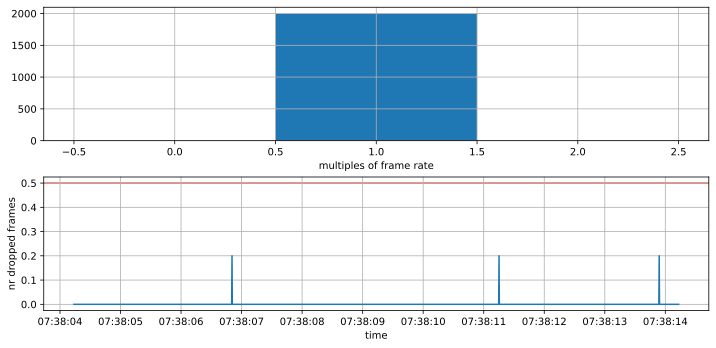

In [6]:
seq.analyse_framerate()

## read lines

In [7]:
lineparam = dict(p0=dict(v=75, h=16), p1=dict(v=46, h=634))

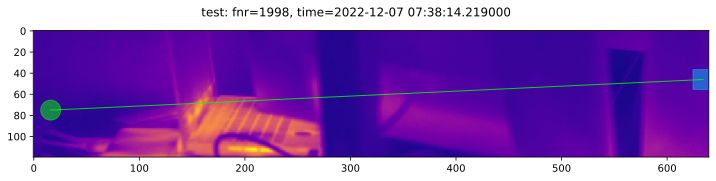

In [8]:
## show line placement
seq.go2frame(-1)
fig = seq.plot_show_line(line=lineparam)
fig.set_size_inches(r_[250, 60]/25.4)
fig.suptitle('{s.filename_woext}: fnr={s.current_frame_number}, time={s.current_frame_time} '.format(s=seq))
fig

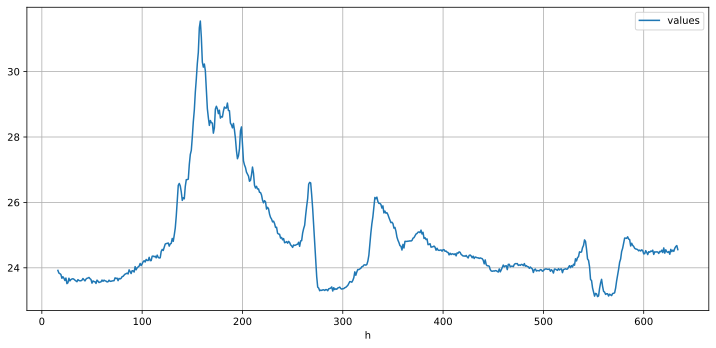

In [9]:
linedata = seq.read_line(line=lineparam)
fig, ax = plt.subplots(1,1)
linedata.plot(ax=ax, x='h', y='values')
ax.grid(True)
fig

In [10]:
## read full data
#%timeit -r1 -n1 
lines_over_time_df = seq.read_line_over_time_df(line=lineparam)

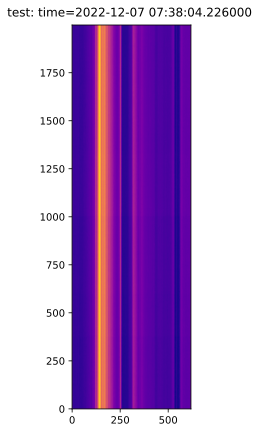

In [11]:
## plot data
param = dict(cmap='plasma') #, vmin=365-273.15, vmax=375-273.15)
fig,ax = plt.subplots(1,1) #,figsize=r_[300, 70]/25.4)
p = ax.imshow(lines_over_time_df.pixels.to_numpy()-273.15, interpolation='nearest', origin='lower', **param)
fig.set_size_inches(r_[300, 150]/25.4)
fig.suptitle('{s.filename_woext}: time={s.first_frame_time} '.format(s=seq))
None
fig

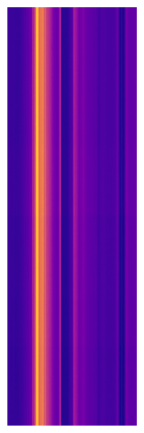

In [12]:
## plot data presentation
param = dict(cmap='plasma') #, vmin=365-273.15, vmax=375-273.15)
fig,ax = plt.subplots(1,1) #,figsize=r_[300, 70]/25.4)
p = ax.imshow(lines_over_time_df.pixels.to_numpy()-273.15, interpolation='nearest', origin='lower', **param)
ax.set_axis_off()
fig.set_size_inches(r_[300, 150]/25.4)
#fig.suptitle('{s.filename_woext}: time={s.first_frame_time} '.format(s=seq))
#ax.set_xlim([2200,4800])
#fig.savefig('presenation_web.png', dpi=600)
None
fig

In [13]:
lines_over_time_df.set_index([('time', 'timestamp')], inplace=True)
#lines_over_time_df.set_index([('time', 'time_sec')], inplace=True)

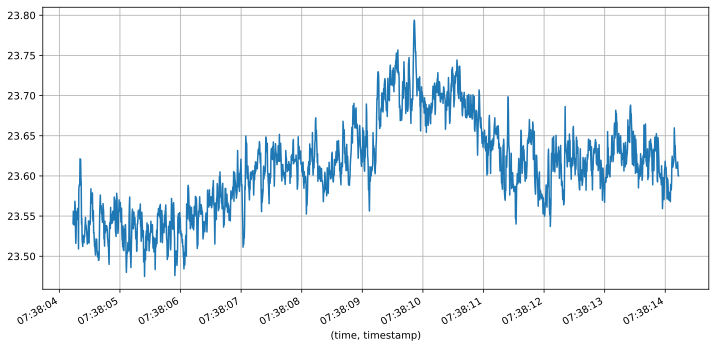

In [14]:
fig, ax = plt.subplots(1,1)
lines_over_time_df.pixels[12].plot(ax=ax)
ax.grid(True)
fig

In [15]:
A, T = seq.read_as_numpy(step=2)

In [16]:
A.shape

(1000, 120, 640)

In [17]:
T

,frame_number,timestamp,time_nom,timeSec0_nom
0,0,2022-12-07 07:38:04.226,2022-12-07 07:38:04.226,0.00
1,2,2022-12-07 07:38:04.236,2022-12-07 07:38:04.236,0.01
2,4,2022-12-07 07:38:04.246,2022-12-07 07:38:04.246,0.02
3,6,2022-12-07 07:38:04.256,2022-12-07 07:38:04.256,0.03
4,8,2022-12-07 07:38:04.266,2022-12-07 07:38:04.266,0.04
...,...,...,...,...
995,1990,2022-12-07 07:38:14.179,2022-12-07 07:38:14.176,9.95
996,1992,2022-12-07 07:38:14.189,2022-12-07 07:38:14.186,9.96
997,1994,2022-12-07 07:38:14.199,2022-12-07 07:38:14.196,9.97
998,1996,2022-12-07 07:38:14.209,2022-12-07 07:38:14.206,9.98
